## Improving generalization

In [24]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [25]:
(train_data, train_labels), (test_images, test_labels) = imdb.load_data(num_words=10000)

In [26]:
def vectorize(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.

    return results

In [27]:
train_data = vectorize(train_data)

**Original model**

In [28]:
model = Sequential([
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [29]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5137 - accuracy: 0.7965 - val_loss: 0.3811 - val_accuracy: 0.8706
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3056 - accuracy: 0.9002 - val_loss: 0.3360 - val_accuracy: 0.8675
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2243 - accuracy: 0.9280 - val_loss: 0.2912 - val_accuracy: 0.8847
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1784 - accuracy: 0.9426 - val_loss: 0.2875 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1472 - accuracy: 0.9521 - val_loss: 0.2809 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1185 - accuracy: 0.9645 - val_loss: 0.2948 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1020 - accuracy: 0.9685 - val_loss: 0.3138 - val_accuracy: 0.8842
Epoch 8/20
30

**Version of the model with lower capacity**

In [30]:
model = Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [31]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_smaller_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6157 - accuracy: 0.7587 - val_loss: 0.5425 - val_accuracy: 0.8341
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4824 - accuracy: 0.8633 - val_loss: 0.4460 - val_accuracy: 0.8533
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3871 - accuracy: 0.8866 - val_loss: 0.3785 - val_accuracy: 0.8727
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3182 - accuracy: 0.9030 - val_loss: 0.3335 - val_accuracy: 0.8776
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2688 - accuracy: 0.9155 - val_loss: 0.3063 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2316 - accuracy: 0.9255 - val_loss: 0.2900 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2028 - accuracy: 0.9359 - val_loss: 0.2775 - val_accuracy: 0.8909
Epoch 8/20
30

**Version of the model with higher capacity**

In [32]:
model = Sequential([
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [33]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_big_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5463 - accuracy: 0.7543 - val_loss: 0.2994 - val_accuracy: 0.8815
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2685 - accuracy: 0.8959 - val_loss: 0.2659 - val_accuracy: 0.8923
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1410 - accuracy: 0.9471 - val_loss: 0.3527 - val_accuracy: 0.8797
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0672 - accuracy: 0.9765 - val_loss: 0.8259 - val_accuracy: 0.7737
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0504 - accuracy: 0.9864 - val_loss: 0.6327 - val_accuracy: 0.8085
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0088 - accuracy: 0.9982 - val_loss: 0.5237 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 7.5419e-04 - accuracy: 0.9999 - val_loss: 0.6289 - val_accuracy: 0.8865
Epoch 8/2

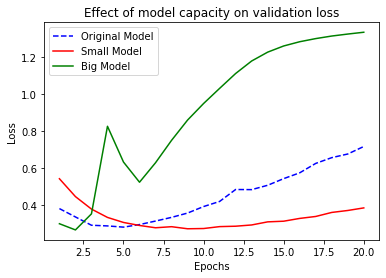

In [34]:
plt.plot(range(1, 21), history.history["val_loss"], "b--", label="Original Model")
plt.plot(range(1, 21), history_smaller_model.history["val_loss"], "r", label="Small Model")
plt.plot(range(1, 21), history_big_model.history["val_loss"], "g", label="Big Model")
plt.title("Effect of model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()